In [ ]:
import numpy as np

date = "mother_folder"
dl_folder = f"base_path/{date}_DL"

dl_number = "project_name"

look_frame = 30
models = 5

In [2]:
importance = np.load(f"{dl_folder}/model_{dl_number}/{date}_{dl_number}_valid_pemutation_importance.npy")
print(importance.shape)

(5, 31, 10)


In [ ]:
# set time frames

fs = 20

# start time
start_value = -1.5

# increase per frames
increment = 1/fs

# frames
count = look_frame+1

t = [start_value + i * increment for i in range(count)]

In [4]:
roi_number = []
for ic in range(importance.shape[2]):
    roi_number.append(f"IC{ic+1}")

print(roi_number)

['IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6', 'IC7', 'IC8', 'IC9', 'IC10']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_PI_mean(importance):
    s = np.mean(importance, axis=0)
    plt.figure(figsize=(4, 4))
    sns.heatmap(s.transpose(),cmap='viridis', vmin=0, vmax=0.006)
    #sns.heatmap(s.transpose(),cmap='viridis')
    ticks = np.arange(0.5, look_frame + 1.0, 10)
    labels = np.linspace(start_value, 0, len(ticks))
    plt.xticks(ticks, labels, rotation=0)
    plt.yticks( np.arange(0.5, importance.shape[2]+0.5), roi_number, rotation=0)
    plt.axvspan(30.45, 30.55, color='black', alpha=1)
    plt.title("Feature importance")
    plt.xlabel("Time (sec)")
    plt.ylabel("IC #")
    plt.show()

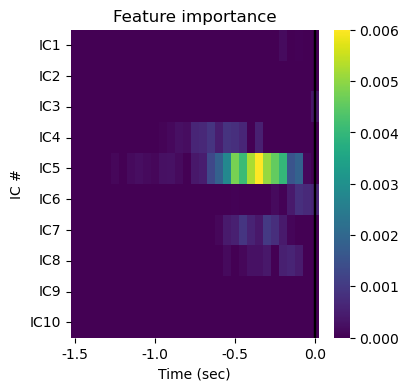

In [6]:
show_PI_mean(importance)

In [ ]:
dl_number2 = "null-model_dir"

importance_null = np.load(f"{dl_folder}/model_{dl_number2}/{date}_{dl_number2}_valid_pemutation_importance.npy")
print(importance_null.shape)

(5, 31, 10)


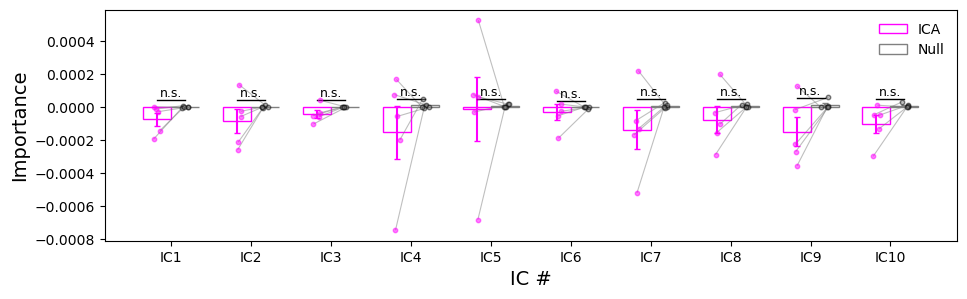

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.collections import LineCollection


start_n, end_n = 0, 10

data1 =  np.mean(importance[:, start_n:end_n], axis=1).transpose()
data2 = np.mean(importance_null[:, start_n:end_n], axis=1).transpose()


n1 = data1.shape[1]
n2 = data2.shape[1]

def get_sig_label(p):
    if p > 0.05:
        return "n.s."
    elif p > 0.01:
        return "*"
    elif p > 0.005:
        return "**"
    else:
        return "***"

p_values = []
for i in range(data1.shape[0]):
    t, p = stats.ttest_rel(data1[i], data2[i])
    p_values.append(p)

fig, ax = plt.subplots(figsize=(11, 3))

n_pairs, n = data1.shape
x = np.arange(n_pairs)
width = 0.35  

means1 = data1.mean(axis=1)
means2 = data2.mean(axis=1)

sems1 = data1.std(axis=1, ddof=1) / np.sqrt(n1)
sems2 = data2.std(axis=1, ddof=1) / np.sqrt(n2)

bars1 = ax.bar(x - width/2, means1, width, yerr=sems1, capsize=2, label='ICA' , color='none', edgecolor='magenta', alpha=1, error_kw=dict(ecolor='magenta'))
bars2 = ax.bar(x + width/2, means2, width, yerr=sems2, capsize=2, label='Null', color='none', edgecolor='gray'   , alpha=1, error_kw=dict(ecolor='gray'))

rng = np.random.default_rng(0)
jit1 = (rng.random((n_pairs, n)) - 0.5) * 0.10
jit2 = (rng.random((n_pairs, n)) - 0.5) * 0.10

for i in range(n_pairs):
    ax.scatter(np.full(n, x[i]-width/2) + jit1[i], data1[i],
               s=10, facecolors='magenta', edgecolors='magenta', alpha=0.5, zorder=3)
    ax.scatter(np.full(n, x[i]+width/2) + jit2[i], data2[i],
               s=10, facecolors='gray', edgecolors='black', alpha=0.5, zorder=3)

segments = []
for i in range(n_pairs):
    xl = (x[i] - width/2) + jit1[i]
    xr = (x[i] + width/2) + jit2[i]
    for k in range(n):
        segments.append([(xl[k], data1[i, k]), (xr[k], data2[i, k])])

lc = LineCollection(segments, colors='gray', linewidths=0.8, alpha=0.5, zorder=2)
ax.add_collection(lc)  


y_max = max(ax.get_ylim()[1], (np.maximum(means1, means2) + 0.4).max())
for i in range(n_pairs):
    p = p_values[i]
    label = get_sig_label(p)

    x1 = x[i] - width/2
    x2 = x[i] + width/2

    bar_max = max(bars1[i].get_height(), bars2[i].get_height())
    h = 0.000001 * (y_max)  
    y = bar_max + 0.0001 * y_max

    ax.plot(
            [x1, x2],
            [y + h, y + h],
            lw=1,
            c='black')

    ax.text((x1 + x2)/2,
            y + h + 0.000005 * y_max,
            label,
            ha='center',
            va='bottom',
            fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels([f'IC{i+1}' for i in range(n_pairs)], rotation=0)
ax.set_xlabel('IC #', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)
ax.legend(frameon=False)
plt.show()